# 1. Import libraries and data
# 2. Data cleaning
# 3. Check extreme values
# 4. Prep data for regression analysis 
# 5. Regression Analysis 
# 6. Conclusions/Bias

# ------------------------------------------------------------------------------------

## Import libraries and data 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Display plots without calling 

%matplotlib inline

In [3]:
#create string for the path 

path = r'C:\Users\kilia\OneDrive\CareerFoundry\Projects\Data Immersion Course\Achievement 6\Berlin_AirBnB Analysis\02 Data\Prepared Data'
path1 =r'C:\Users\kilia\OneDrive\CareerFoundry\Projects\Data Immersion Course\Achievement 6\Berlin_AirBnB Analysis\04 Analysis\Visualizations'


In [4]:
# define column types
dtype_options = {'15':str}

In [5]:
# Import data

df = pd.read_csv(os.path.join(path,'3.0 AirBnB_categorical columns.csv'), index_col = 0)

C:\Users\kilia\AppData\Local\Temp\ipykernel_289344\1339579203.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(path,'3.0 AirBnB_categorical columns.csv'), index_col = 0)


In [6]:
# Display all columns 

pd.set_option('display.max_columns', None)

## Data cleaning 

In [7]:
df.head(20)

,Review ID,Review_Date,Reviewer ID,Rating_Comment,Listing ID,Listing Name,Host ID,Host Since,Host Response Time,Host Response Rate,Is Superhost,Neighborhood,Neighborhood Group,City,Postal Code,Country,Latitude,Longitude,Property Type,Room Type,Accomodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Min Nights,Reviews,First Review,Last Review,Overall Rating,Accuracy Rating,Cleanliness Rating,Checkin Rating,Communication Rating,Location Rating,Value Rating,Instant Bookable,Price category,Rating Category,Accomodation Size
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,58660447,2016-01-03,14876562,"Very nice, clean appartement! Josh was really ...",10002699,Trendy and peaceful Kreuzkölln,44696672,2015-09-20,NaN,NaN,False,Neukölln,Neukölln,Berlin,12047.0,Germany,52.49234,13.42994,Apartment,Entire home/apt,4,1.0,2.0,2.0,60.0,1,1,1,2016-01-03,2016-01-03,100.0,8.0,10.0,6.0,10.0,10.0,10.0,False,Middle price,Good Rating,Couple Accomodation
2,58663795,2016-01-03,49367757,Aki is really nice and friendly. We had an ama...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,Middle price,Good Rating,Single Accomodation
3,59003619,2016-01-05,46694292,Aki is a very nice dude with a clean place in ...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,Middle price,Good Rating,Single Accomodation
4,66845661,2016-03-25,54542819,Aki's place was easy to find and located in th...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,Middle price,Good Rating,Single Accomodation
5,67969785,2016-04-01,35352843,We had to wait 30mins for Aki to arrive but ot...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,Middle price,Good Rating,Single Accomodation
6,68816282,2016-04-06,48006291,"Great room, very comfortable and clean. Aki an...",10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,Middle price,Good Rating,Single Accomodation
7,69289363,2016-04-10,63759402,Aki was really friendly and available giving u...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,Middle price,Good Rating,Single Accomodation
8,69780867,2016-04-13,53960263,Aki es sin duda el mejor host q uno puede tene...,10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,Middle price,Good Rating,Single Accomodation
9,70426866,2016-04-17,26184931,"We did not meer Aki, but we did meet FabiÃ¡n, ...",10006647,Very central and very quite,40791092,2015-08-07,within a few hours,100.0,False,Mitte,Mitte,Berlin,10178.0,Germany,52.52134,13.41866,Apartment,Private room,2,1.0,1.0,1.0,35.0,1,1,20,2016-01-03,2017-02-12,92.0,9.0,8.0,9.0,10.0,10.0,9.0,False,Middle price,Good Rating,Single Accomodation


In [8]:
df.shape

(452805, 41)

#### Missing Values

In [9]:
# Check for missing values

df.isnull().sum()

# I don't need the Host Response Time and Rate for this analysis so I don't handle those missing values, 
# I impute the missing Overall Rating values with the mean of the column 

Review ID                   0
Review_Date                 0
Reviewer ID                 0
Rating_Comment            208
Listing ID                  0
Listing Name              183
Host ID                     0
Host Since                 38
Host Response Time      55964
Host Response Rate      55964
Is Superhost                0
Neighborhood                0
Neighborhood Group          0
City                        0
Postal Code              7586
Country                     0
Latitude                    0
Longitude                   0
Property Type               0
Room Type                   0
Accomodates                 0
Bathrooms                 937
Bedrooms                  709
Beds                       72
Price                       0
Guests Included             0
Min Nights                  0
Reviews                     0
First Review                0
Last Review                 0
Overall Rating            565
Accuracy Rating           598
Cleanliness Rating        596
Checkin Ra

In [10]:
mean_rating = df['Value Rating'].mean()
df['Value Rating'] = df['Value Rating'].fillna(mean_rating)

In [11]:
df.isnull().sum()

Review ID                   0
Review_Date                 0
Reviewer ID                 0
Rating_Comment            208
Listing ID                  0
Listing Name              183
Host ID                     0
Host Since                 38
Host Response Time      55964
Host Response Rate      55964
Is Superhost                0
Neighborhood                0
Neighborhood Group          0
City                        0
Postal Code              7586
Country                     0
Latitude                    0
Longitude                   0
Property Type               0
Room Type                   0
Accomodates                 0
Bathrooms                 937
Bedrooms                  709
Beds                       72
Price                       0
Guests Included             0
Min Nights                  0
Reviews                     0
First Review                0
Last Review                 0
Overall Rating            565
Accuracy Rating           598
Cleanliness Rating        596
Checkin Ra

#### Duplicates

In [12]:
dups = df.duplicated()

In [13]:
dups.shape # No dups

(452805,)

## Check extreme values

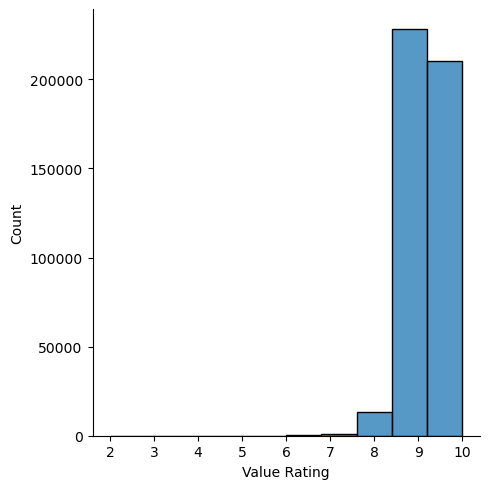

In [14]:
sns.displot(df['Value Rating'], bins=10)


In [15]:
df['Value Rating'].mean() # Check the mean

9.426747577861175

In [16]:
df['Value Rating'].median() # Check the mean

9.0

In [17]:
df['Value Rating'].max() # Check the mean

10.0

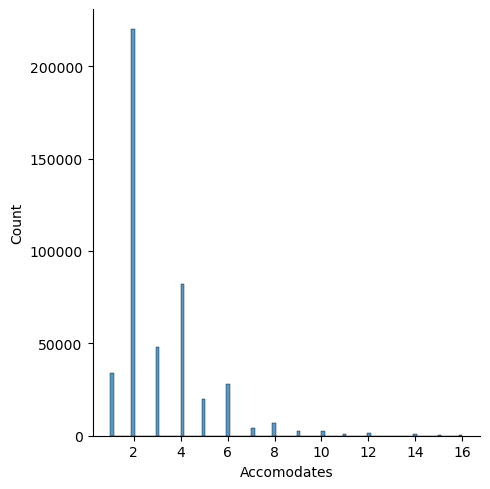

In [18]:
sns.displot(df['Accomodates'], bins=100) # Shows extreme values
# I think some outliers need to be removed

In [19]:
df['Accomodates'].mean() # Check the mean

3.1079868817702985

In [20]:
df['Accomodates'].median() # Check the mean

2.0

In [21]:
df['Accomodates'].max() # Check the mean

16

### From task 6.2 I already have scatterplots saved and I want to analyze Accomodates/Value Rating due to the highest correlation.

### Hypothesis: The more people can be accomodated the better the value rating.  

## Prep data for regression analysis 

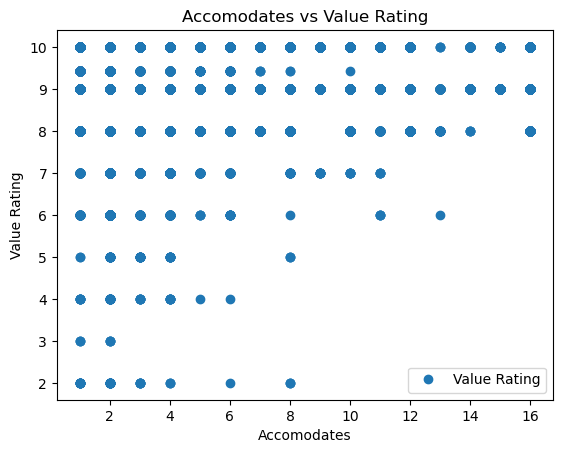

In [22]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other

df.plot(x = 'Accomodates', y='Value Rating',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Accomodates vs Value Rating')  
plt.xlabel('Accomodates')  
plt.ylabel('Value Rating') 
plt.show()

In [23]:
# Reshape the variables into NumPy arrays and put them into separate objects

X = df['Accomodates'].values.reshape(-1,1)
y = df['Value Rating'].values.reshape(-1,1)

In [24]:
X

array([[4],
       [2],
       [2],
       ...,
       [2],
       [2],
       [2]], dtype=int64)

In [25]:
y

array([[10.],
       [ 9.],
       [ 9.],
       ...,
       [ 9.],
       [ 9.],
       [ 9.]])

In [26]:
# Split data into a training set and a test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regressoin analysis

In [27]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set

In [28]:
# Fit the regression object onto the training set

regression.fit(X_train, y_train)

LinearRegression()

In [29]:
# Predict the values of y using X

y_predicted = regression.predict(X_test)

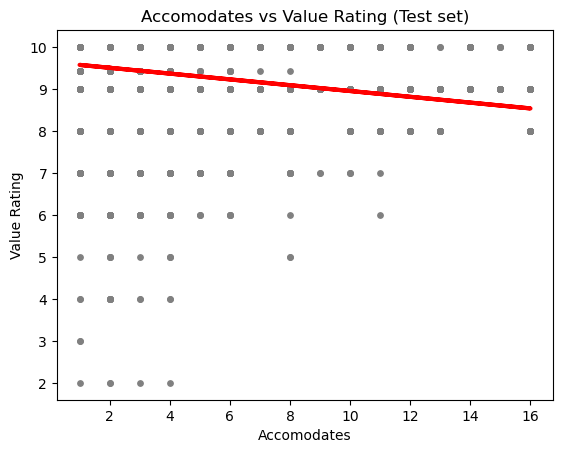

In [30]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Accomodates vs Value Rating (Test set)')
plot_test.xlabel('Accomodates')
plot_test.ylabel('Value Rating')
plot_test.show()

### It doesnt look like the model is a good fit as the regression line is not in the direction of relationship.

In [31]:
# Create objects that contain the model summary statistics

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [32]:
# Print model summary statistics

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.06912573]]
Mean squared error:  0.3110993271703161
R2 score:  0.054739342681216274


### Model performance is really bad. MSE of 0.3110993271703161 is relatively high compared to the variance and the R2 score of 0.054739342681216274 is also very low. 

In [33]:
y_predicted

array([[9.503314  ],
       [9.503314  ],
       [9.503314  ],
       ...,
       [9.57243972],
       [9.36506255],
       [9.503314  ]])

In [34]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,10.0,9.503314
1,9.0,9.503314
2,10.0,9.503314
3,9.0,9.226811
4,9.0,9.088560
5,8.0,9.088560
6,9.0,9.434188
7,10.0,9.503314
8,10.0,9.503314
9,10.0,9.503314


##### Compare how the regression fits the training set

In [35]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [36]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [37]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.06912573]]
Mean squared error:  0.31606811297498044
R2 score:  0.05327790631057849


### The MSE here is nearly the same as with the test set. Means the model isn't overfitted. The R2 score is a little bit better but still very low. 

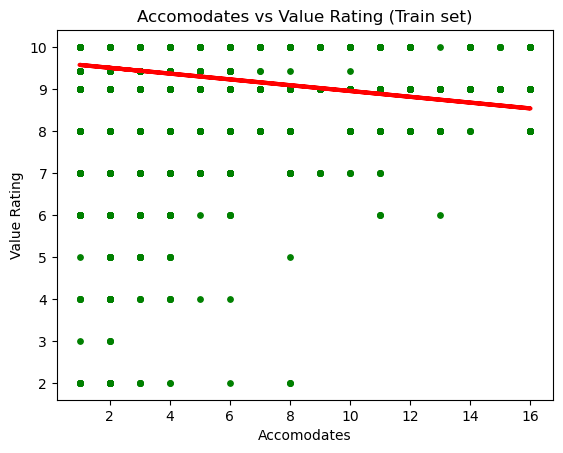

In [38]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Accomodates vs Value Rating (Train set)')
plot_test.xlabel('Accomodates')
plot_test.ylabel('Value Rating')
plot_test.show()

# Conclusions/Bias
### Hypothesis: The more people can be accomodated the better the value rating. 
### Only partially true
### The number of accomodates isn't a good standalone indicator for better Value Rating.
### I think there are to many factors that influence the rating other than price. A multiple regression model could be a better fit. 
### Something regarding bias to consider here is that people tend to only give a rating if the accomodation was bad. Even though AirBnB does a lot to get the users to rate the listings every time. So there could be some negativity bias here. 